In [1]:
import os
import json
import pandas as pd

Které knihy jsou ve srovnání: česká fikce a non-fikce vydaná v letech 2023 a 2024, u které se podařilo načíst ISBN z Martinus.cz a prostřednictvím tohoto ISBN stáhnout data z Goodreads a Databáze knih.

## Goodreads

In [4]:
gr = pd.read_csv(os.path.join("data","goodreads-hodnoceni.csv"))

In [5]:
gr.columns

Index(['GR_isbn', 'GR_date', 'GR_title', 'GR_rating', 'GR_ratings_count',
       'GR_reviews', 'GR_published', 'GR_1_stars', 'GR_2_stars', 'GR_3_stars',
       'GR_4_stars', 'GR_5_stars', 'GR_pages', 'GR_format'],
      dtype='object')

In [6]:
gr = gr.sort_values(by='GR_date')

In [7]:
gr['GR_date'].max()

'2024-12-09 09:52:29'

In [8]:
gr['GR_date'] = pd.to_datetime(gr['GR_date'])

In [9]:
    gr.groupby(pd.Grouper(key='GR_date', freq='W'))['GR_isbn'].nunique().tail(3).iloc[::-1]

GR_date
2024-12-15    1105
2024-12-08    1095
2024-12-01    1045
Freq: -1W-SUN, Name: GR_isbn, dtype: int64

In [10]:
gr_nejnovejsi = gr.groupby(pd.Grouper(key='GR_date', freq='W'))['GR_isbn'].nunique().tail(3).iloc[::-1].index.to_list()[1]

In [11]:
gr_nejnovejsi

Timestamp('2024-12-08 00:00:00')

In [12]:
starsi = gr[gr['GR_date'] <= str(gr_nejnovejsi)]['GR_title'].to_list()

In [13]:
novinky = gr[~gr['GR_title'].isin(starsi)]['GR_title'].to_list()
print("Novinky " + str(gr_nejnovejsi)[0:10] + "\n-", end =" ")
print('\n- '.join(novinky))

Novinky 2024-12-08
- Jak dědeček zachránil trolejbus by Lenka Arazimová
- Flora by Jonáš Zbořil
- Sladký život by Lucie Tringelová Kaňová
- Úděsné dny Adély H: # ty_vole_tabor by Aleš Novotný
- Prosím žádné zmrtvýchvstání by Ondřej Novotný
- Flora by Jonáš Zbořil


### Nejlépe hodnocené knihy vůbec

In [15]:
gr[gr['GR_ratings_count'] >= 100].groupby('GR_title')['GR_rating'].last().nlargest(30)

GR_title
Zuzana Čaputová - Neztratit se sama sobě: Knižní rozhovor se slovenskou prezidentkou by Erik Tabery    4.80
Zuzana Čaputová: Neztratit se sama sobě by Erik Tabery                                                 4.77
U severní zdi by Petra Klabouchová                                                                     4.69
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická                    4.68
V pasti pohlaví by Silvie Lauder                                                                       4.61
Nepatrná ztráta osamělosti by Eli Beneš                                                                4.54
Stačí mávnout křídly (Stačí mávnout křídly, #1) by Sára Topinková                                      4.47
Krutý měsíc by Jana Jašová                                                                             4.43
Severka by Nina Špitálníková                                                                           4.43
Píseň L. by Veronik

### Nejvíce hodnocení

In [17]:
gr.groupby("GR_title")['GR_ratings_count'].max().nlargest(30)

GR_title
Les v domě by Alena Mornštajnová                                                                       2373.0
Srpny by Jakub Stanjura                                                                                1481.0
Severka by Nina Špitálníková                                                                           1167.0
Těla by Klára Vlasáková                                                                                1034.0
Rozložíš paměť by Marek Torčík                                                                          956.0
Národní opruzení by Karolína Zoe Meixnerová                                                             691.0
Kde jsi, když nejsi by Radka Třeštíková                                                                 674.0
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická                     660.0
Jsme nevyhnutelní (Navždycky #4) by Nofreeusernames                                                     599.0
G

### Nejvíce nových hodnocení od dubna '24

In [19]:
pd.Series(gr.groupby("GR_title")['GR_ratings_count'].max() - gr.groupby("GR_title")['GR_ratings_count'].min()).nlargest(25)

GR_title
Rozložíš paměť by Marek Torčík                                                         636.0
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická    607.0
Severka by Nina Špitálníková                                                           537.0
Srpny by Jakub Stanjura                                                                531.0
Odvaha by Markéta Lukášková                                                            369.0
Těla by Klára Vlasáková                                                                304.0
Gazely by Patrik Hartl                                                                 243.0
Fosilie by Michal Kašpárek                                                             240.0
Lásky čas by Adéla Rosípalová                                                          239.0
U severní zdi by Petra Klabouchová                                                     199.0
Pláňata by Petra Dvořáková                                   

In [20]:
import datetime

In [21]:
two_weeks_ago = datetime.datetime.now() - datetime.timedelta(days=13)
two_weeks_ago = two_weeks_ago.strftime('%Y-%m-%d')

In [22]:
week_ago = datetime.datetime.now() - datetime.timedelta(days=6)
week_ago = week_ago.strftime('%Y-%m-%d')

In [23]:
month_ago = pd.to_datetime(gr['GR_date'].max()) - datetime.timedelta(days=29)
month_ago = month_ago.strftime('%Y-%m-%d')
month_ago

'2024-11-10'

In [24]:
gr_stare = gr[gr['GR_date'] < month_ago]['GR_title'].drop_duplicates().to_list()
gr_nove = gr[~gr['GR_title'].isin(gr_stare)]['GR_title'].drop_duplicates().to_list()
gr_nove

['Pusa z Albertiny by Vincent Riva',
 'Zápas o Ameriku: Hlasy z rozeštvané země by Jan Kaliba',
 'Reportér na odstřel by Marek Wollner',
 'Osiřelo dítě by Štěpán Kučera',
 'Meč pro krále by Michal Zmítko',
 'Případ ztraceného psa by Václav Gruber',
 'Karel IV. – Prokleté dědictví by Jaromír Jindra',
 'Dokud není konec by Filip Saiver',
 'V každe chvíli jste mi vzorem by Jiří Halda',
 'Dev - Příběh Devory Sharpové by Kristyna Andrews',
 'Český bestiář by Jiří Padevět',
 'Drak na polní cestě by Jiří Hájíček',
 'Arboriáni v temných časech by Ivan Bauer',
 'František Palacký: Aristokrat českého ducha by Hana Parkánová-Whitton',
 'George Voskovec & John Werich: Americká cesta by Michal Bystrov',
 'Třicetiletá válka by Jan Kilián',
 'Andulka Andula by Patrik Hartl',
 '50 příběhů pražského metra by Michaela Rulíšková',
 'Luna z lůna 3: Tajemství by Barbora Englischová',
 'Pohádky z malovaných hrníčků by Dana Doležalová',
 'V uniformě beránka by Václav Jabůrek',
 'Závojnatky by Jiří B. Mayer',

In [25]:
gr[gr['GR_title'].str.contains('Flora',na=False)]

,GR_isbn,GR_date,GR_title,GR_rating,GR_ratings_count,GR_reviews,GR_published,GR_1_stars,GR_2_stars,GR_3_stars,GR_4_stars,GR_5_stars,GR_pages,GR_format
24892,https://www.goodreads.com/book/show/221241627-...,2024-12-09 01:27:41,Flora by Jonáš Zbořil,4.57,63.0,8.0,"January 1, 2024",0.0,0.0,5.0,17.0,41.0,168.0,paperback
25818,https://www.goodreads.com/book/show/221241627-...,2024-12-09 09:52:29,Flora by Jonáš Zbořil,4.57,63.0,8.0,"January 1, 2024",0.0,0.0,5.0,17.0,41.0,168.0,paperback


### Nejvíce hodnocení za poslední měsíc

In [27]:
goodreads_mesic_ratings = pd.Series(gr.groupby("GR_title")['GR_ratings_count'].max() - gr[gr['GR_date'] > month_ago].groupby("GR_title")['GR_ratings_count'].min()).sort_values(ascending=False)
goodreads_mesic_ratings = goodreads_mesic_ratings[goodreads_mesic_ratings >= 10]
goodreads_mesic_ratings

GR_title
Les v domě by Alena Mornštajnová                                                       41.0
Severka by Nina Špitálníková                                                           37.0
Zuzana Čaputová: Neztratit se sama sobě by Erik Tabery                                 37.0
Srpny by Jakub Stanjura                                                                34.0
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická    31.0
Den po dni by Nofreeusernames                                                          30.0
Ignis fatuus by Petra Klabouchová                                                      29.0
Rozložíš paměť by Marek Torčík                                                         25.0
U severní zdi by Petra Klabouchová                                                     22.0
Těla by Klára Vlasáková                                                                19.0
Gazely by Patrik Hartl                                                 

In [28]:
goodreads_mesic_novinky = pd.Series(gr[gr['GR_title'].isin(gr_nove)].groupby("GR_title")['GR_ratings_count'].max() - gr[(gr['GR_title'].isin(gr_nove)) & (gr['GR_date'] > month_ago)].groupby("GR_title")['GR_ratings_count'].min()).sort_values(ascending=False)
goodreads_mesic_novinky = goodreads_mesic_novinky[goodreads_mesic_novinky >= 3]
goodreads_mesic_novinky

GR_title
Den po dni by Nofreeusernames                                                 30.0
Drak na polní cestě by Jiří Hájíček                                           17.0
Šílenství v nás by Annora Nesta                                                5.0
Osiřelo dítě by Štěpán Kučera                                                  5.0
Andulka Andula by Patrik Hartl                                                 4.0
Mimo obraz by Jiří Březina                                                     4.0
O hvězdách víš hovno by Petr   Hanel                                           4.0
Pusa z Albertiny by Vincent Riva                                               4.0
Když přišli psi by Scarlett Wilková                                            3.0
Zápas o Ameriku: Hlasy z rozeštvané země by Jan Kaliba                         3.0
Historky z Tinderu 2 aneb Láska, sex a ten pravý nikde by Lucie Macháčková     3.0
Nocturno pro Erika by Klára Pospíšilová                                       

### Nejvíce hodnocení v posledním týdnu a dvou

In [30]:
pd.Series(gr[gr['GR_date'] > two_weeks_ago].groupby("GR_title")['GR_ratings_count'].max() - gr[gr['GR_date'] < week_ago].groupby("GR_title")['GR_ratings_count'].max()).nlargest(25)

GR_title
#Nezapomeň. Příběhy Paměti národa by Irena Tatíčková                                       NaN
100 rád pre aktívnych ľudí by Michal Červený                                               NaN
100+24 brněnských kuriozit, absurdit a bizarností by Miloš Šenkýř                          NaN
13! by Pavel Tomeš                                                                         NaN
1492: Dobytí Granady by Lukáš Zárybnický                                                   NaN
151+ nápadů na můj bucket list by Lucie Kutrová                                            NaN
20 let slam poetry: Nejlepší česká slam poetry 2003-2023 by Tomáš T. Kůs                   NaN
3.7.1866: Bitva u Hradce Králové by Vojtěch Kessler                                        NaN
30 hodin: Ověř nápad v rekordním čase a rozjeď vysněné podnikání by Dalibor Pulkert        NaN
30 let (nejen) písní od cimbálu by Dalibor Štrunc                                          NaN
4 povídky by Lenka Poláčková             

In [31]:
pd.Series(gr[gr['GR_date'] > two_weeks_ago].groupby("GR_title")['GR_ratings_count'].max() - gr[gr['GR_date'] < two_weeks_ago].groupby("GR_title")['GR_ratings_count'].max()).nlargest(25)

GR_title
#Nezapomeň. Příběhy Paměti národa by Irena Tatíčková                                       NaN
100 rád pre aktívnych ľudí by Michal Červený                                               NaN
100+24 brněnských kuriozit, absurdit a bizarností by Miloš Šenkýř                          NaN
13! by Pavel Tomeš                                                                         NaN
1492: Dobytí Granady by Lukáš Zárybnický                                                   NaN
151+ nápadů na můj bucket list by Lucie Kutrová                                            NaN
20 let slam poetry: Nejlepší česká slam poetry 2003-2023 by Tomáš T. Kůs                   NaN
3.7.1866: Bitva u Hradce Králové by Vojtěch Kessler                                        NaN
30 hodin: Ověř nápad v rekordním čase a rozjeď vysněné podnikání by Dalibor Pulkert        NaN
30 let (nejen) písní od cimbálu by Dalibor Štrunc                                          NaN
4 povídky by Lenka Poláčková             

### Pokus s time series

In [33]:
vyvoj = gr[['GR_date','GR_title','GR_ratings_count','GR_rating']]
vyvoj['GR_date'] = pd.to_datetime(vyvoj['GR_date'])
vyvoj = vyvoj.sort_values(by='GR_date')
vyvoj = vyvoj.set_index('GR_date')

C:\Users\micha\AppData\Local\Temp\ipykernel_27576\4007299537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vyvoj['GR_date'] = pd.to_datetime(vyvoj['GR_date'])


<Axes: xlabel='GR_date'>

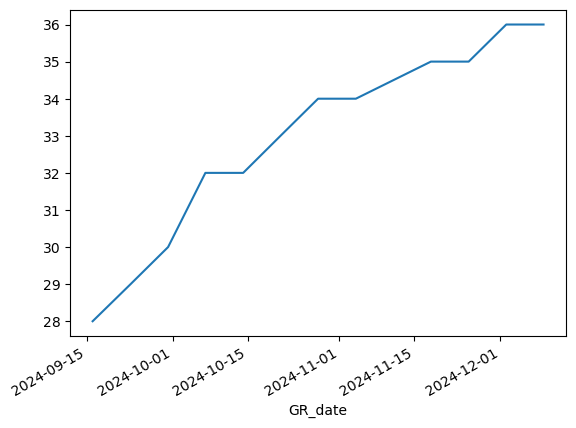

In [34]:
vyvoj[vyvoj['GR_title'].str.contains('Duše národa',na=False)]['GR_ratings_count'].plot()

<Axes: xlabel='GR_date'>

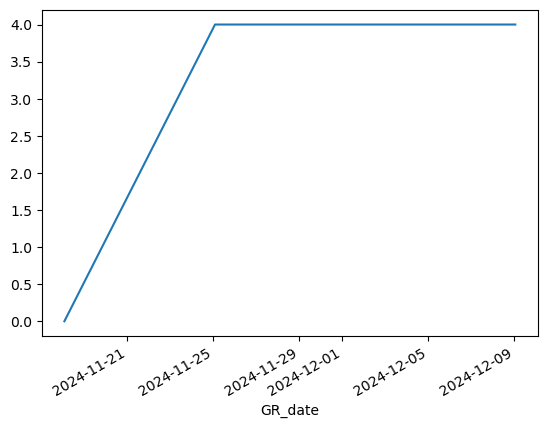

In [35]:
vyvoj[vyvoj['GR_title'].str.contains('Reportér',na=False)]['GR_rating'].plot()

<Axes: xlabel='GR_date'>

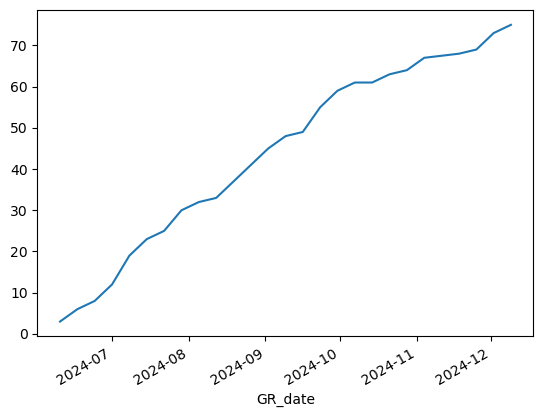

In [36]:
vyvoj[vyvoj['GR_title'].str.contains('Pacanka',na=False)]['GR_ratings_count'].plot()

### Další pokusy

In [38]:
gr['GR_date'] = pd.to_datetime(gr['GR_date'])

In [39]:
tydny = gr.groupby(pd.Grouper(key='GR_date', freq='W'))['GR_ratings_count'].sum()
tydny

GR_date
2024-04-14    12240.0
2024-04-21        0.0
2024-04-28    12964.0
2024-05-05    13236.0
2024-05-12    13890.0
2024-05-19    14266.0
2024-05-26    14562.0
2024-06-02    14983.0
2024-06-09    15329.0
2024-06-16    15749.0
2024-06-23    16109.0
2024-06-30    16324.0
2024-07-07    16739.0
2024-07-14    17279.0
2024-07-21    18029.0
2024-07-28    18238.0
2024-08-04    18808.0
2024-08-11    19056.0
2024-08-18    19455.0
2024-08-25    20045.0
2024-09-01    20290.0
2024-09-08    20706.0
2024-09-15    20620.0
2024-09-22    20218.0
2024-09-29    23189.0
2024-10-06    28599.0
2024-10-13    29026.0
2024-10-20    29629.0
2024-10-27    29994.0
2024-11-03    30460.0
2024-11-10    30895.0
2024-11-17        0.0
2024-11-24    31699.0
2024-12-01    32023.0
2024-12-08    32934.0
2024-12-15    32544.0
Freq: W-SUN, Name: GR_ratings_count, dtype: float64

In [40]:
monthly_sum = tydny.resample('M').sum()
monthly_sum

C:\Users\micha\AppData\Local\Temp\ipykernel_27576\2088204097.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = tydny.resample('M').sum()


GR_date
2024-04-30     25204.0
2024-05-31     55954.0
2024-06-30     78494.0
2024-07-31     70285.0
2024-08-31     77364.0
2024-09-30    105023.0
2024-10-31    117248.0
2024-11-30     93054.0
2024-12-31     97501.0
Freq: ME, Name: GR_ratings_count, dtype: float64

In [41]:
monthly_diff = monthly_sum.diff()
monthly_diff

GR_date
2024-04-30        NaN
2024-05-31    30750.0
2024-06-30    22540.0
2024-07-31    -8209.0
2024-08-31     7079.0
2024-09-30    27659.0
2024-10-31    12225.0
2024-11-30   -24194.0
2024-12-31     4447.0
Freq: ME, Name: GR_ratings_count, dtype: float64

In [42]:
gr

,GR_isbn,GR_date,GR_title,GR_rating,GR_ratings_count,GR_reviews,GR_published,GR_1_stars,GR_2_stars,GR_3_stars,GR_4_stars,GR_5_stars,GR_pages,GR_format
0,9788075884374,2024-04-08 00:00:27,"Stará béčková legenda (Stará béčková legenda, ...",4.15,20.0,6.0,"April 3, 2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9788088067757,2024-04-08 00:00:30,Není nebe nad Mexikem by Michal Březina,3.40,5.0,1.0,"April 3, 2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9788072444816,2024-04-08 00:00:34,Město nad městem by Lucie Brejšová,4.64,14.0,7.0,"May 9, 2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9788027801145,2024-04-08 00:00:39,Prázdnota by Michaela Merglová,3.66,32.0,13.0,"January 1, 2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9788081116148,2024-04-08 00:00:44,„Jmenuji se Eva…“ by Jana Mirovská,4.43,7.0,3.0,"January 1, 2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25814,9788088482116,2024-12-09 03:33:23,Tak akorát čas jít domů by Xerodoth Sigmius,1.00,1.0,0.0,"January 1, 2023",1.0,0.0,0.0,0.0,0.0,66.0,paperback
25815,9788027150854,2024-12-09 03:33:25,Lovci lidí: Revizorské humoresky by Vladimír Dyk,4.00,1.0,0.0,"July 13, 2023",0.0,0.0,0.0,1.0,0.0,108.0,hardcover
25816,9788027150380,2024-12-09 03:33:33,Malé tečky světla by Zuzana Švédová,4.67,3.0,0.0,"November 20, 2023",0.0,0.0,0.0,1.0,2.0,192.0,hardcover
25817,9780745347400,2024-12-09 03:33:41,The Paradox of Svalbard: Climate Change and Gl...,4.18,22.0,1.0,"July 20, 2023",0.0,1.0,4.0,7.0,10.0,232.0,paperback


In [43]:
prvni = gr.groupby('GR_title')['GR_date'].min()
prvni = prvni[prvni < '2024-04-22']
prvni = prvni.index.to_list()

In [44]:
pocitaci_zaklad = gr[~gr['GR_title'].isin(prvni)][['GR_date','GR_title','GR_rating','GR_ratings_count']].sort_values(by='GR_date')
pocitaci_zaklad

,GR_date,GR_title,GR_rating,GR_ratings_count
519,2024-04-22 02:00:14,Sochař by Artur Janoušek,3.25,4.0
520,2024-04-22 02:00:17,I smutek byl jen sen. Poezie Josefa Kocourka b...,4.00,1.0
521,2024-04-22 02:00:19,Hranice zvrhlosti by Jan Urban,3.29,14.0
522,2024-04-22 02:00:22,Z pera knihomolů: 11 povídek od českých a slov...,3.85,144.0
577,2024-04-22 02:05:37,Výstava chameleonů by Filip Mikuš,5.00,1.0
...,...,...,...,...
25811,2024-12-09 03:33:11,Písmem mojí přítelkyně by Barbora Linke,5.00,1.0
25812,2024-12-09 03:33:18,Pod letní oblohou by Šárka Hieková,3.00,1.0
25813,2024-12-09 03:33:21,Výměna by Alisek,3.00,1.0
25815,2024-12-09 03:33:25,Lovci lidí: Revizorské humoresky by Vladimír Dyk,4.00,1.0


In [45]:
pocitaci_zaklad['tydnu'] = pocitaci_zaklad.groupby('GR_title').cumcount() + 1

In [46]:
pocitaci_zaklad.sort_values(by="tydnu")

,GR_date,GR_title,GR_rating,GR_ratings_count,tydnu
519,2024-04-22 02:00:14,Sochař by Artur Janoušek,3.25,4.0,1
15890,2024-09-30 02:01:24,Jako liči by Tereza Navrátila,4.13,8.0,1
15887,2024-09-30 02:01:05,Chladný král by Michala Vera Jírová,3.33,46.0,1
15886,2024-09-30 02:01:01,"Dotýkej se mámy, dokud je živá ... by Monika R...",0.00,0.0,1
15883,2024-09-30 02:00:38,Rodinné poklady by Pavla Trnková,4.00,2.0,1
...,...,...,...,...,...
25493,2024-12-09 02:46:04,Psycholožky v županu by Tereza Beníčková,3.71,7.0,33
25781,2024-12-09 03:28:13,Výstava chameleonů by Filip Mikuš,3.67,3.0,33
25499,2024-12-09 02:46:34,Jaroslav Róna: apokalypsy a vize by Barbora Pu...,4.00,1.0,33
24886,2024-12-09 01:27:06,Manuál běžce by Pavel Červinka,3.00,2.0,33


<Axes: xlabel='tydnu'>

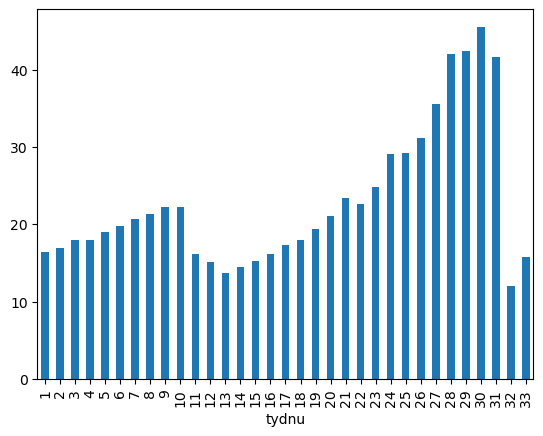

In [47]:
pocitaci_zaklad.groupby('tydnu')['GR_ratings_count'].mean().plot.bar()

<Axes: xlabel='tydnu'>

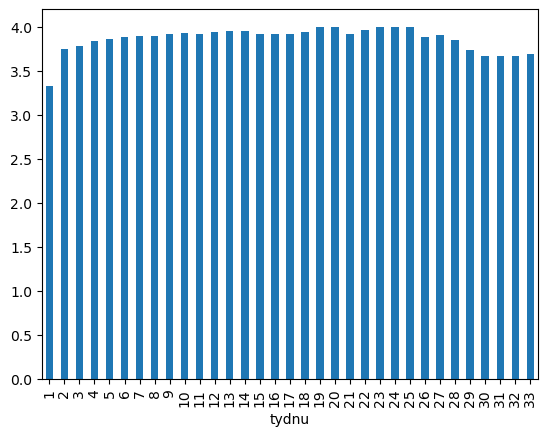

In [48]:
pocitaci_zaklad.groupby('tydnu')['GR_rating'].median().plot.bar()

In [49]:
import matplotlib.pyplot as plt


<Axes: title={'center': 'GR_ratings_count'}, xlabel='tydnu'>

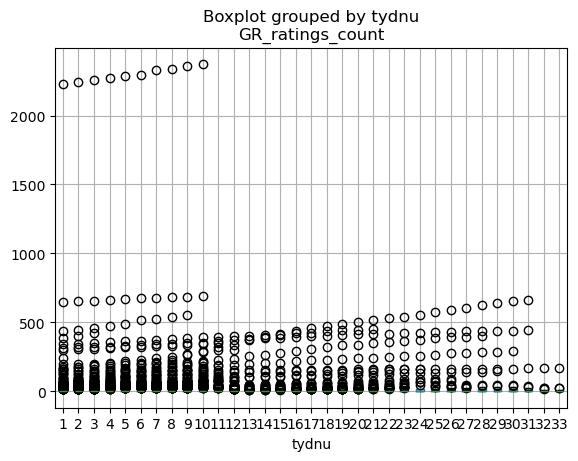

In [50]:
pocitaci_zaklad.boxplot(column='GR_ratings_count', by='tydnu')

## Databáze knih

In [52]:
x = pd.read_json(os.path.join("data","martinus_vyslo.json"))

In [53]:
x

,M_titul,M_autorstvo,M_anotace,M_podtitul,M_tagy,M_počet_stran,M_vazba,M_rozměr,M_hmotnost,M_isbn,...,M_překlad,M_série,M_díl,M_věkové_doporučení,M_styl,M_účel_knihy,M_ostatní,M_příloha,M_jazyková_úroveň,M_knižní_předloha
0,Score\n Novinka,Marcy Jell,"Rafaela:\n Všichni předpokládají, že se mám ja...",None,romantika,200.0,brožovaná vazba,None,None,9788053005999,...,None,None,NaN,NaN,romantický,None,None,None,None,None
1,V nefritové kleci\n Novinka,Jakub Mařík,SBÍRKA KRATŠÍCH PŘÍBĚHŮ ZE SVĚTA AKČNÍ SCI-FI ...,None,"[krvavé bitvy, vesmír, nebezpečné tajemství, v...",464.0,brožovaná vazba,149×205 mm,594 g,9788075887368,...,None,UTSS Salamis,6.0,NaN,"[mysteriózní, dobrodružný, napínavý]",None,None,None,None,None
2,Zmizení nenápadné účetní - Krimi 4/24\n ...,[],Skutečné případy.,None,"[krimi, skutečné příběhy]",144.0,brožovaná vazba,119×189 mm,102 g,9788072225514,...,None,Krimi 2024,4.0,NaN,napínavý,None,None,None,None,None
3,Paralelní světy\n Novinka,Jenny Naomi,"Čekal jsem smrt, jenomže namísto ní přišlo vyh...",Poslední potomek,"[paralelní svět, fantasy, svět]",NaN,brožovaná vazba,215×155 mm,None,9788088652854,...,None,None,NaN,NaN,mysteriózní,None,None,None,None,None
4,Kacířské vinobraní\n Novinka,Josef Holcman,"Josef Holcman, autor knih Týden co týden (2001...",None,příroda,136.0,brožovaná vazba,144×210 mm,None,9788027153923,...,None,None,NaN,NaN,cestopisný,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,Báječná léta pod psa,Michal Viewegh,Moderní klasika z pera populárního spisovatele...,None,"[Česko, Československo, 20. století, satira, p...",264.0,pevná vazba,146×185 mm,436 g,9788024936802,...,None,None,NaN,NaN,"[duchovní, humorný, filozofický]",None,None,None,None,None
12704,Europeana,Patrik Ouředník,Co je pravda? Historická pravda? Literární pra...,Stručné dějiny dvacátého věku,None,100.0,pevná vazba,130×210 mm,224 g,9788072078325,...,None,None,NaN,NaN,None,None,None,None,None,None
12705,Zbabělci,Josef Škvorecký,Dnes už kultovní a také světově proslulý román...,None,"[historické události, duše dospívajícího, 1945...",432.0,pevná vazba,139×204 mm,557 g,9788073354008,...,None,Danny Smiřický,1.0,NaN,historický,None,None,None,None,None
12706,Teorie spolehlivosti,Ivan Diviš,Druhé rozšířené vydání. Rozsáhlá kniha krátkýc...,Texty z let 1960/1999,None,712.0,pevná vazba,140×200 mm,26 g,8072151614,...,None,None,NaN,NaN,None,None,None,None,None,None


In [54]:
dk = pd.read_csv(os.path.join("data","databazeknih-hodnoceni.csv"))

C:\Users\micha\AppData\Local\Temp\ipykernel_27576\1836397398.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  dk = pd.read_csv(os.path.join("data","databazeknih-hodnoceni.csv"))


In [55]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'DK_autorstvo', 'DK_vyslo',
       'DK_Mé_knihovně'],
      dtype='object')

In [56]:
dk[dk['DK_titul'].str.contains('Válka s')]['DK_isbn'].to_list()

[9788074973178.0,
 9788074973178.0,
 9788074973178.0,
 9788074973178.0,
 9788074973178.0,
 9788074973178.0,
 9788074973178.0,
 9788074973178.0,
 9788074973178.0,
 9788074973178.0,
 9788074973178.0,
 9788074973178.0]

In [57]:
    month_ago = pd.to_datetime(gr['GR_date'].max()) - datetime.timedelta(days=29)


In [58]:
dk['skore'] = dk['DK_Chystám_se_číst'] + dk['DK_Přečtených']
dk['skore']

0         48.0
1        117.0
2        612.0
3         52.0
4        246.0
         ...  
57429     13.0
57430     11.0
57431     20.0
57432      NaN
57433      6.0
Name: skore, Length: 57434, dtype: float64

In [59]:
dk.sample(10)

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených,DK_autorstvo,DK_vyslo,DK_Mé_knihovně,skore
45224,9.788028e+12,2024-11-11 04:07:25,Retrokrimi: Kriminální případy z let 1883–1961,80.0,5.0,"['Detektivky, krimi', 'Literatura faktu']",NaN,6.0,1.0,29.0,24.0,3.0,1.0,NaN,['Emil Hruška'],NaN,NaN,30.0
50669,9.788026e+12,2024-12-02 04:02:16,Cesta za štěstím vedla peklem,80.0,7.0,"['Literatura česká', 'Biografie a memoáry']",NaN,8.0,1.0,NaN,4.0,1.0,NaN,NaN,['Michal Svatopluk'],2023.0,NaN,12.0
15790,9.788077e+12,2024-07-22 03:38:12,"Blackout: Co dělat, když nastane",80.0,3.0,"['Literatura naučná', 'Sociologie, společnost'...",NaN,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
50189,9.788028e+12,2024-12-02 03:57:21,"Husitská epopej. V, 1450",89.0,347.0,"['Literatura česká', 'Historické romány']",6.0,515.0,38.0,241.0,101.0,33.0,6.0,33.0,['Vlastimil Vondruška'],2022.0,NaN,616.0
7696,9.788027e+12,2024-06-10 03:37:54,Ekonomické jednohubky,83.0,6.0,"['Literatura naučná', 'Ekonomie a obchod']",2.0,7.0,1.0,3.0,11.0,5.0,NaN,NaN,NaN,NaN,NaN,18.0
31450,9.788077e+12,2024-09-30 03:56:20,Případ rozeklaného tunelu,93.0,8.0,"['Detektivky, krimi', 'Literatura česká']",1.0,9.0,3.0,3.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,11.0
16378,9.788090e+12,2024-07-22 03:43:41,Ulčákův rok / Ulčák´s Year,87.0,3.0,"['Literatura česká', 'Poezie']",NaN,5.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37393,9.788022e+12,2024-10-21 04:03:50,Zlatokopka,70.0,135.0,"['Romány', 'Pro ženy', 'Literatura slovenská']",NaN,201.0,19.0,154.0,37.0,4.0,1.0,7.0,['Lucia Sasková'],NaN,NaN,238.0
16410,9.788075e+12,2024-07-22 03:43:54,Prý musím projít březovým lesem,100.0,2.0,"['Literatura česká', 'Poezie']",NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48096,9.788026e+12,2024-11-25 03:41:24,Alois Rašín: Dramatický život českého politika,83.0,7.0,"['Literatura naučná', 'Biografie a memoáry', '...",NaN,12.0,NaN,5.0,4.0,5.0,NaN,1.0,['Jana Čechurová'],NaN,NaN,16.0


In [60]:
gr['GR_title'].nunique()

1170

In [61]:
dk['DK_titul'].nunique()

2594

In [62]:
dk

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených,DK_autorstvo,DK_vyslo,DK_Mé_knihovně,skore
0,9.788028e+12,2024-04-22 03:26:55,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,48.0,29.0,6.0,1.0,NaN,NaN,NaN,NaN,48.0
1,9.788028e+12,2024-04-22 03:26:55,"Prach, popel a dým",79.0,58.0,"['české krimi', 'české detektivky', 'pátrající...",NaN,85.0,9.0,66.0,32.0,NaN,NaN,7.0,NaN,NaN,NaN,117.0
2,9.788021e+12,2024-04-22 03:26:55,Oprátka za osm mrtvých,88.0,301.0,"['ženy', 'psychiatrické léčebny', 'Českosloven...",2.0,402.0,56.0,150.0,210.0,61.0,9.0,22.0,NaN,NaN,NaN,612.0
3,9.788072e+12,2024-04-22 03:26:56,Golem,82.0,26.0,"['golem', 'Rabi Löw']",NaN,34.0,4.0,28.0,18.0,3.0,NaN,3.0,NaN,NaN,NaN,52.0
4,9.788076e+12,2024-04-22 03:26:57,Proč všichni odcházejí,90.0,56.0,['autobiografické prvky'],2.0,68.0,1.0,14.0,178.0,52.0,NaN,6.0,NaN,NaN,NaN,246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57429,9.788088e+12,2024-12-16 04:21:11,Byla to jízda: (Do říše snů!),80.0,3.0,[],NaN,5.0,1.0,2.0,8.0,1.0,NaN,NaN,['Valentina Lebová'],2023.0,NaN,13.0
57430,9.788075e+12,2024-12-16 04:21:11,Politika pro každého,80.0,3.0,[],NaN,4.0,1.0,1.0,7.0,1.0,NaN,NaN,"['Bohumil Pečinka', 'Stanislav Balík']",2023.0,NaN,11.0
57431,9.788074e+12,2024-12-16 04:21:12,Křížeček na čelo,68.0,15.0,[],NaN,18.0,NaN,4.0,2.0,NaN,NaN,NaN,['Eva Marie Růžena'],2023.0,NaN,20.0
57432,9.788076e+12,2024-12-16 04:21:12,Siebel Si 204 / Aero C,100.0,1.0,[],NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,['Miroslav Irra'],2022.0,NaN,NaN


In [63]:
len(dk)

57434

In [64]:
len(dk.drop_duplicates())

57434

In [65]:
dk['DK_date'].max()

'2024-12-16 04:21:13'

In [66]:
dk['DK_date'] = pd.to_datetime(dk['DK_date'])

In [67]:
novinky

['Jak dědeček zachránil trolejbus by Lenka Arazimová',
 'Flora by Jonáš Zbořil',
 'Sladký život by Lucie Tringelová Kaňová',
 'Úděsné dny Adély H: # ty_vole_tabor by Aleš Novotný',
 'Prosím žádné zmrtvýchvstání by Ondřej Novotný',
 'Flora by Jonáš Zbořil']

In [68]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'DK_autorstvo', 'DK_vyslo',
       'DK_Mé_knihovně', 'skore'],
      dtype='object')

In [69]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'DK_autorstvo', 'DK_vyslo',
       'DK_Mé_knihovně', 'skore'],
      dtype='object')

In [70]:
dk_nove = dk[dk['DK_date'] < '2024-04-22']['DK_titul'].drop_duplicates().to_list()
dk_nove = dk[~dk['DK_titul'].isin(dk_nove)]

In [71]:
pocitame_dk = dk_nove[['DK_titul','DK_date','DK_rating','DK_ratings_count','DK_Chystám_se_číst']]

In [72]:
pocitame_dk['tydnu'] = pocitame_dk.groupby('DK_titul').cumcount() + 1

C:\Users\micha\AppData\Local\Temp\ipykernel_27576\4289471237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pocitame_dk['tydnu'] = pocitame_dk.groupby('DK_titul').cumcount() + 1


<Axes: xlabel='tydnu'>

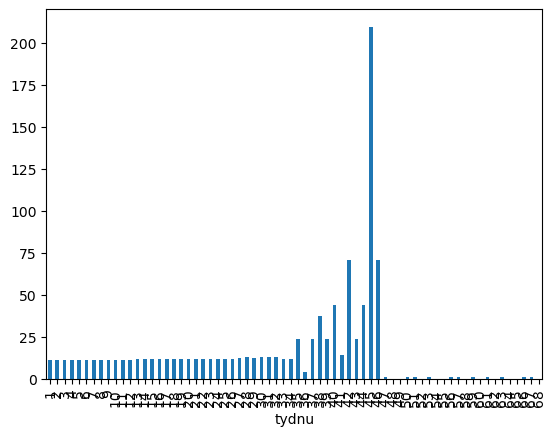

In [73]:
pocitame_dk.groupby('tydnu')['DK_Chystám_se_číst'].median().plot.bar()

<Axes: xlabel='tydnu'>

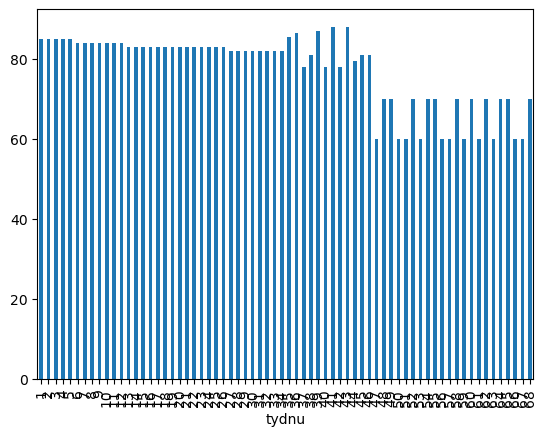

In [74]:
pocitame_dk.groupby('tydnu')['DK_rating'].median().plot.bar()

In [75]:
gr['autorstvo'] = gr['GR_title'].apply(lambda x: x.split(' by ')[1].strip())

In [76]:
gr['autorstvo']

0            Shigor Birdman
1            Michal Březina
2            Lucie Brejšová
3         Michaela Merglová
4             Jana Mirovská
                ...        
25814      Xerodoth Sigmius
25815          Vladimír Dyk
25816        Zuzana Švédová
25817    Zdenka Sokolíčková
25818          Jonáš Zbořil
Name: autorstvo, Length: 25819, dtype: object

In [77]:
import numpy as np

In [78]:
df = pd.read_json(os.path.join("data","martinus_vyslo.json"))

In [79]:
df['isbn'] = df['M_isbn'].astype(str).apply(lambda x: x.replace(".0",""))
dk['isbn'] = dk['DK_isbn'].astype(str).apply(lambda x: x.replace(".0",""))

In [80]:
df

,M_titul,M_autorstvo,M_anotace,M_podtitul,M_tagy,M_počet_stran,M_vazba,M_rozměr,M_hmotnost,M_isbn,...,M_série,M_díl,M_věkové_doporučení,M_styl,M_účel_knihy,M_ostatní,M_příloha,M_jazyková_úroveň,M_knižní_předloha,isbn
0,Score\n Novinka,Marcy Jell,"Rafaela:\n Všichni předpokládají, že se mám ja...",None,romantika,200.0,brožovaná vazba,None,None,9788053005999,...,None,NaN,NaN,romantický,None,None,None,None,None,9788053005999
1,V nefritové kleci\n Novinka,Jakub Mařík,SBÍRKA KRATŠÍCH PŘÍBĚHŮ ZE SVĚTA AKČNÍ SCI-FI ...,None,"[krvavé bitvy, vesmír, nebezpečné tajemství, v...",464.0,brožovaná vazba,149×205 mm,594 g,9788075887368,...,UTSS Salamis,6.0,NaN,"[mysteriózní, dobrodružný, napínavý]",None,None,None,None,None,9788075887368
2,Zmizení nenápadné účetní - Krimi 4/24\n ...,[],Skutečné případy.,None,"[krimi, skutečné příběhy]",144.0,brožovaná vazba,119×189 mm,102 g,9788072225514,...,Krimi 2024,4.0,NaN,napínavý,None,None,None,None,None,9788072225514
3,Paralelní světy\n Novinka,Jenny Naomi,"Čekal jsem smrt, jenomže namísto ní přišlo vyh...",Poslední potomek,"[paralelní svět, fantasy, svět]",NaN,brožovaná vazba,215×155 mm,None,9788088652854,...,None,NaN,NaN,mysteriózní,None,None,None,None,None,9788088652854
4,Kacířské vinobraní\n Novinka,Josef Holcman,"Josef Holcman, autor knih Týden co týden (2001...",None,příroda,136.0,brožovaná vazba,144×210 mm,None,9788027153923,...,None,NaN,NaN,cestopisný,None,None,None,None,None,9788027153923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,Báječná léta pod psa,Michal Viewegh,Moderní klasika z pera populárního spisovatele...,None,"[Česko, Československo, 20. století, satira, p...",264.0,pevná vazba,146×185 mm,436 g,9788024936802,...,None,NaN,NaN,"[duchovní, humorný, filozofický]",None,None,None,None,None,9788024936802
12704,Europeana,Patrik Ouředník,Co je pravda? Historická pravda? Literární pra...,Stručné dějiny dvacátého věku,None,100.0,pevná vazba,130×210 mm,224 g,9788072078325,...,None,NaN,NaN,None,None,None,None,None,None,9788072078325
12705,Zbabělci,Josef Škvorecký,Dnes už kultovní a také světově proslulý román...,None,"[historické události, duše dospívajícího, 1945...",432.0,pevná vazba,139×204 mm,557 g,9788073354008,...,Danny Smiřický,1.0,NaN,historický,None,None,None,None,None,9788073354008
12706,Teorie spolehlivosti,Ivan Diviš,Druhé rozšířené vydání. Rozsáhlá kniha krátkýc...,Texty z let 1960/1999,None,712.0,pevná vazba,140×200 mm,26 g,8072151614,...,None,NaN,NaN,None,None,None,None,None,None,8072151614


In [81]:
df['isbn']

0        9788053005999
1        9788075887368
2        9788072225514
3        9788088652854
4        9788027153923
             ...      
12703    9788024936802
12704    9788072078325
12705    9788073354008
12706       8072151614
12707    9788087270516
Name: isbn, Length: 12708, dtype: object

In [82]:
dk['skore'] = dk['DK_Chystám_se_číst'] + dk['DK_Přečtených']

In [83]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'DK_autorstvo', 'DK_vyslo',
       'DK_Mé_knihovně', 'skore', 'isbn'],
      dtype='object')

In [84]:
df.columns

Index(['M_titul', 'M_autorstvo', 'M_anotace', 'M_podtitul', 'M_tagy',
       'M_počet_stran', 'M_vazba', 'M_rozměr', 'M_hmotnost', 'M_isbn',
       'M_rok_vydání', 'M_jazyk', 'M_původ', 'M_nakladatel', 'M_pro_koho',
       'M_originální_název', 'M_kategorizace', 'M_cena', 'M_obálka', 'M_ebook',
       'M_audiokniha', 'M_datum', 'M_soubor', 'M_předběžné_datum_vydání',
       'M_ilustrace', 'M_editoři', 'M_edice', 'M_vydání', 'M_překlad',
       'M_série', 'M_díl', 'M_věkové_doporučení', 'M_styl', 'M_účel_knihy',
       'M_ostatní', 'M_příloha', 'M_jazyková_úroveň', 'M_knižní_předloha',
       'isbn'],
      dtype='object')

### Nejvíce nových hodnocení od dubna '24

In [86]:
def hezky_titul(row):
    try:
        autorstvo = df[df['isbn'] == row['isbn']]['M_autorstvo'].drop_duplicates().to_list()[0]
        return f"""{autorstvo}: {row['DK_titul']}"""
    except:
        return f"""?: {row['DK_titul']}"""

In [87]:
dk['hezky_titul'] = dk.apply(lambda row: hezky_titul(row), axis=1)

In [88]:
pd.Series(dk.groupby("hezky_titul")['DK_ratings_count'].max() - dk.groupby("hezky_titul")['DK_ratings_count'].min()).nlargest(20)

hezky_titul
Karin Lednická: Šikmý kostel 3                  1143.0
Markéta Lukášková: Odvaha                        667.0
Patrik Hartl: Gazely                             640.0
Nina Špitálníková: Severka                       540.0
Kristýna Trpková: Někdo z nás                    525.0
?: U severní zdi                                 459.0
Petra Dvořáková: Pláňata                         345.0
Petra Klabouchová: Ignis fatuus                  318.0
Marek Torčík: Rozložíš paměť                     300.0
Kateřina Surmanová: Tři Sekery                   275.0
Hana Marie Kornerová: Heřmánkové údolí           270.0
Leoš Kyša: Sudetenland                           264.0
Michaela Klevisová: Vraní oko                    253.0
Štěpán Javůrek: Sudetský dům II: Podzim 1947     251.0
Tereza Bartošová: Klekánice                      247.0
Jakub Stanjura: Srpny                            246.0
Radka Třeštíková: Kde jsi, když nejsi            238.0
Tereza Bartošová Dvořáková: Vodník               226.

In [89]:
#!/usr/bin/env python

import os
import requests
import datetime
import pandas as pd

kam_stahovat = "downloads/aleph"

if not os.path.exists(kam_stahovat):
    os.makedirs(kam_stahovat)

stazene = [s.split('.')[0] for s in os.listdir(kam_stahovat)]

isbns = [i for i in pd.read_json(os.path.join('data','martinus_vyslo.json'))['M_isbn'].to_list() if len(i) == 13]

print(f'{len(isbns)} ISBN ke stažení')

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36"
}

for i in isbns[1000:1005]:
    if i not in stazene:

        try:
            print(f"Stahuji ISBN {i}")
            r = requests.get(f"https://aleph.nkp.cz/F/?func=find-b&find_code=ISN&x=0&y=0&request={i}&filter_code_1=WTP&filter_request_1=&filter_code_2=WLN&adjacent=N", headers=headers, timeout=15)
            r.encoding = r.apparent_encoding
            if "Úplné zobrazení záznamu" in r.text:
                with open(os.path.join(kam_stahovat,f'{i}.html'), "w+", encoding='utf-8') as f:
                    f.write(f"""{r.text}\n\n<!-- {datetime.datetime.now().replace(microsecond=0)} -->""")
        except Exception as E:
            print(E)
            pass
    else:
        print(f"ISBN {i} už staženo")

for filename in os.listdir(kam_stahovat):
    file_path = os.path.join(kam_stahovat, filename)
    if os.path.isfile(file_path) and os.path.getsize(file_path) == 0:
        print(f'Mažu {filename}')
        os.remove(file_path)

12290 ISBN ke stažení
Stahuji ISBN 9788087362341
Stahuji ISBN 9788027910151
Stahuji ISBN 9788090772632
Stahuji ISBN 9788020460776
Stahuji ISBN 9788027904969


In [90]:
dk_stare = dk[dk['DK_date'] < month_ago]['hezky_titul'].drop_duplicates().to_list()
dk_nove = dk[~dk['hezky_titul'].isin(dk_stare)]['hezky_titul'].drop_duplicates().to_list()
dk_nove

['Alena Jakoubková: Sestra v klatbě',
 'Bob Kuřík: Nečekáme nic od reforem: Kapitoly o českém anarchismu',
 'Gabor Klaniczay: Časy otřesů: Čtyři medievisté a dvacáté století ve střední Evropě',
 '?: Flora',
 '?: Freud a osudová žena',
 'Karel Veselý: Hudba srdce: Metafyzika popu',
 'Vlastimil Hela: Fenomén Bílé Karpaty',
 '?: Canto ostinato: Listopad, prožitky blízké zimy',
 'Jana Endlicherová: Job v zahraničí',
 'Ladislav Beran: Jak přijít o vraha',
 'Michal Viewegh: Bůh v renaultu',
 'Vít Lucuk: Navzdory osudu',
 'Petr Blažek: Koněv: Sovětský maršál a jeho pražský pomník',
 '?: Za plátno nevidíš',
 '?: Strašidelné Vánoce na hradě',
 '?: Toužimský & Moravec: Příběh nakladatelství',
 '?: Osm očí bez obočí',
 '?: Errol. Josefa Škvoreckého život první, 1924–1969',
 '?: Školní příběh pejska a kočičky',
 'Pavel Vančata: Velitel palubních mechaniků: Služba palubních mechaniků na Liberatorech 311. perutě a životní osudy jejich velitele Stanislava Slezáčka',
 'Vlastimil Vondruška: Slavná léta

In [91]:
dk_mesic_celkem = pd.Series(dk.groupby("hezky_titul")['skore'].max() - dk[dk['DK_date'] > month_ago].groupby("hezky_titul")['skore'].min()).sort_values(ascending=False)
dk_mesic_celkem.nlargest(30)

hezky_titul
Karin Lednická: Šikmý kostel 3                                          166.0
Hana Whitton: Anna Svídnická: Krásná Anna – nečekaná láska Karla IV.    160.0
Petra Klabouchová: Ignis fatuus                                         159.0
?: Drak na polní cestě                                                  158.0
?: Aristokratka v Československu                                        128.0
?: Les v domě                                                           115.0
Ondřej Šanc: Jako po drátku                                             109.0
?: Les                                                                  100.0
Markéta Lukášková: Odvaha                                                99.0
Patrik Hartl: Gazely                                                     99.0
Marek Torčík: Rozložíš paměť                                             88.0
Iva Hadj Moussa: Těžké duše                                              87.0
Tereza Boučková: Dům v Matoušově ulici              

In [92]:
def nakladatelstvi(isbn):
    try:
        return df[df['isbn'] == isbn]['M_nakladatel'].drop_duplicates().to_list()[0]
    except:
        return None

In [93]:
dk['nakladatel'] = dk['isbn'].apply(lambda x: nakladatelstvi(x))

In [94]:
dk['nakladatel'].sample(20)

51387    Jan Těsnohlídek - JT´s nakladatelství
48053                Akademie výtvarných umění
7331                  Akademie múzických umění
48301                                   Epocha
26362                                   Dybbuk
52217                                     MaHa
52422                                Protimluv
53362                                     None
39104                                  Eminent
35431                  Nakladatelství Fragment
48987                      Jonathan Livingston
1999                             C. H. Beck SK
30451                                     None
14074                              Radioservis
42328                                  Malvern
55084                                     Maťa
27774                                   CPRESS
7804                                 CooBoo CZ
35728                                   Kalibr
676                                       Host
Name: nakladatel, dtype: object

In [95]:
dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel','skore'])['DK_date'].first()

hezky_titul                                              nakladatel     skore
A. Gravensteen: Tahle voda je naše                       Paseka         17.0    2024-12-02 04:09:32
                                                                        18.0    2024-12-09 03:54:11
                                                                        19.0    2024-12-16 03:59:27
Adam Kašpar: Adam Kašpar                                 Books & Pipes  2.0     2024-11-11 03:49:22
Adam Táborský: Terapie mezi stromy                       Portál         25.0    2024-11-11 03:52:32
                                                                                        ...        
Šárka Przewozná: Skutečná                                Vendeta        53.0    2024-11-18 04:06:04
                                                                        56.0    2024-12-02 04:21:11
                                                                        57.0    2024-12-16 04:01:45
Žaneta Neužilová: Do s

In [96]:
dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()

hezky_titul                                              nakladatel   
A. Gravensteen: Tahle voda je naše                       Paseka            17.0
Adam Kašpar: Adam Kašpar                                 Books & Pipes      2.0
Adam Táborský: Terapie mezi stromy                       Portál            25.0
Adriana Krnáčová: Nemesis: Temné město                   Kalibr            25.0
Adéla Chrástecká: Všechno, co jsem zapomněla             Pointa            44.0
                                                                          ...  
Šárka Andrlová: Tajemství domu v L.                      Moba             168.0
Šárka Hieková: Léto na zámku                             Moba              68.0
Šárka Hieková: Možná už zítra                            Moba             161.0
Šárka Przewozná: Skutečná                                Vendeta           52.0
Žaneta Neužilová: Do skonání věků 2: A jak to bylo dál?  Pointa            13.0
Name: skore, Length: 1767, dtype: float64

In [97]:
pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min())

,,skore
hezky_titul,nakladatel,
A. Gravensteen: Tahle voda je naše,Paseka,2.0
Adam Kašpar: Adam Kašpar,Books & Pipes,0.0
Adam Táborský: Terapie mezi stromy,Portál,3.0
Adriana Krnáčová: Nemesis: Temné město,Kalibr,1.0
"Adéla Chrástecká: Všechno, co jsem zapomněla",Pointa,5.0
...,...,...
Šárka Andrlová: Tajemství domu v L.,Moba,4.0
Šárka Hieková: Léto na zámku,Moba,6.0
Šárka Hieková: Možná už zítra,Moba,11.0


In [98]:
pribytek = pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()).groupby('nakladatel').sum().reset_index().sum().iloc[1]

In [99]:
nakladatelstvo = pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()).groupby('nakladatel').sum().reset_index()
nakladatelstvo['podil'] = nakladatelstvo['skore'] / pribytek
nakladatelstvo = nakladatelstvo[nakladatelstvo['podil'] >= 0.01]
nakladatelstvo['podil'] = nakladatelstvo['podil'].apply(lambda x: f"""{round(x * 100, 1)} %""".replace(".", ","))
nakladatelstvo = nakladatelstvo.sort_values(by='skore',ascending=False)
nakladatelstvo = nakladatelstvo.drop(columns=['skore'])
nakladatelstvo

,nakladatel,podil
202,Motto,"10,4 %"
128,Host,"9,2 %"
199,Moba,"9,2 %"
131,Ikar CZ,"6,6 %"
250,Paseka,"4,3 %"
21,Argo,"4,1 %"
144,Kalibr,"3,7 %"
89,Epocha,"3,4 %"
47,Bílá vrána,"2,7 %"
210,Mystery Press,"2,3 %"


In [100]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'DK_autorstvo', 'DK_vyslo',
       'DK_Mé_knihovně', 'skore', 'isbn', 'hezky_titul', 'nakladatel'],
      dtype='object')

In [101]:
def koho_vydavaji(n):
    top = dk[dk['nakladatel'] == n].groupby('hezky_titul')['DK_ratings_count'].max().nlargest(10).index.to_list()
    top2 = [x.split(":")[0] for x in top if "[" not in x]
    top2 = list(set(top2))
    kolik = len(top2)
    if kolik >= 3:
        return top2[:3]
    else:
        return top2

In [102]:
for index, row in nakladatelstvo.iterrows():
    stars = koho_vydavaji(row['nakladatel'])
    stars_kratce = [x.split(' ')[-1] for x in stars]
    print(stars_kratce)

['Lukášková', 'Duffková', 'Poncarová']
['Denemarková', 'Lauder', 'Šesták']
['Vondruška', 'Javůrek', 'Horáková']
['Křivánková', 'Dolejšová', 'Kubíková']
['Dostálová', 'Kašpárek', 'Hlaučo']
['Hůlová', 'Kang', 'Štoflová']
['Surmanová', 'Ludvíková', 'Bauer']
['Sněgoňová', 'Bureš', 'Kotleta']
['Lednická']
['Rejfová', 'Mařík', 'Velinský']
['Hartl', 'Kalenda', 'Chalupníková']
['Ambrožová', 'Vlasáková', 'Huškova']
['Heinrichová', 'Meixnerová', 'Nofreeusernames']
['Řehák', 'Švanda', 'Veselá']
['Kyša', 'Piloušková', 'Przewozná']
['Vojáček', 'Žáková', 'Müller']
['Špitálníková']
['Eislerová', 'Luxová', 'Rosípalová']
['Švancara', 'Kokinopulosová', 'Marková']
['Jell', 'Sky', 'Peas']
['Macek', 'Pavel', 'Novotný']
['Sacká', 'Hlubek', 'Hlavničková']
['Březina', 'Saavedra', 'Sokol']


In [103]:
dk[dk['DK_date'] > month_ago].groupby(['nakladatel','hezky_titul'])['skore'].max().nlargest(20)

nakladatel    hezky_titul                                                  
Bourdon       Patrik Hartl: Okamžiky štěstí                                    8932.0
Moba          Hana Marie Kornerová: Heřmánkové údolí                           7365.0
Triáda        Anne Franková: Zadní dům: Deník                                  7207.0
Mladá fronta  Bohumil Hrabal: Obsluhoval jsem anglického krále                 3605.0
Bourdon       Patrik Hartl: Gazely                                             3185.0
Kniha Zlín    Hynek Čapka: Neviditelné kořeny                                  3065.0
1400          Jaroslav Hašek: Osudy dobrého vojáka Švejka za světové války     2492.0
Odeon CZ      ['Josef Lada', 'Jaroslav Hašek']: Osudy dobrého vojáka Švejka    2492.0
Bílá vrána    Karin Lednická: Šikmý kostel 3                                   2478.0
Motto         Jana Poncarová: Podbrdské ženy                                   2408.0
              Michaela Klevisová: Vraní oko                     

In [104]:
dk[dk['hezky_titul'].str.contains('Prchal')]

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,...,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených,DK_autorstvo,DK_vyslo,DK_Mé_knihovně,skore,isbn,hezky_titul,nakladatel


In [105]:
koho_vydavaji('Listen')

['Dorota Ambrožová', 'Klára Vlasáková', 'Lucie Huškova']

In [106]:
for index, row in nakladatelstvo.iterrows():
    stars = koho_vydavaji(row['nakladatel'])
    print(', '.join(stars))

Markéta Lukášková, Michaela Duffková, Jana Poncarová
Radka Denemarková, Silvie Lauder, Petr Šesták
Vlastimil Vondruška, Štěpán Javůrek, Naďa Horáková
Pavlína Křivánková, Eva Dolejšová, Karla Kubíková
Zuzana Dostálová, Michal Kašpárek, Miroslav Hlaučo
Petra Hůlová, Kateřina Kang, Danka Štoflová
Kateřina Surmanová, Jitka Ludvíková, Jan Bauer
Kristýna Sněgoňová, Roman Bureš, František Kotleta
Karin Lednická
Marie Rejfová, Jakub Mařík, Jaroslav Velinský
Patrik Hartl, František Kalenda, Kateřina Chalupníková
Dorota Ambrožová, Klára Vlasáková, Lucie Huškova
Alena Adrianet Heinrichová, Karolína Zoe Meixnerová, Nofreeusernames
Jakub Řehák, Martin Švanda, Marta Jirousová Veselá
Leoš Kyša, Irena Piloušková, Šárka Przewozná
Jan Vojáček, Ivana Žáková, František Müller
Nina Špitálníková
Jana Eislerová, Blanka Luxová, Adéla Rosípalová
Jan Švancara, Iva Kokinopulosová, Tereza Marková
Marcy Jell, Indy Sky, Nika Peas
Miroslav Macek, Josef Pavel, Aleš Novotný
Vlaďka Sacká, Jan Hlubek, Lenka Hlavničková


In [107]:
nakladatelstvo

,nakladatel,podil
202,Motto,"10,4 %"
128,Host,"9,2 %"
199,Moba,"9,2 %"
131,Ikar CZ,"6,6 %"
250,Paseka,"4,3 %"
21,Argo,"4,1 %"
144,Kalibr,"3,7 %"
89,Epocha,"3,4 %"
47,Bílá vrána,"2,7 %"
210,Mystery Press,"2,3 %"


In [108]:
dk_mesic_nakladatele = pd.Series(dk[dk['DK_date'] > week_ago].groupby("nakladatel")['skore'].sum() - dk[dk['DK_date'] > month_ago].groupby("nakladatel")['skore'].sum()).sort_values(ascending=False)
dk_mesic_nakladatele.nlargest(30)

nakladatel
1400                                NaN
65. pole                            NaN
ANAG                                NaN
AOS Publishing                      NaN
AURICON                             NaN
Academia                            NaN
Agentura Pankrác                    NaN
Akademické nakladatelství, VUTIUM   NaN
Akademie múzických umění            NaN
Akademie výtvarných umění           NaN
Akcent                              NaN
Akropolis                           NaN
Albatros CZ                         NaN
Aldebaran Group for Astrophysics    NaN
Aleš Čeněk                          NaN
Alferia                             NaN
Alpha book                          NaN
Alpress                             NaN
Arbor vitae                         NaN
Archa                               NaN
Ares                                NaN
Argo                                NaN
Art And Animation studio            NaN
ArtKrist                            NaN
ArtPorte                     

In [109]:
dk_mesic_novinky = pd.Series(dk[~dk['hezky_titul'].isin(dk_stare)].groupby("hezky_titul")['skore'].max() - dk[(~dk['hezky_titul'].isin(dk_stare)) & (dk['DK_date'] > month_ago)].groupby("hezky_titul")['skore'].min()).sort_values(ascending=False)
dk_mesic_novinky = dk_mesic_novinky[dk_mesic_novinky >= 10]
dk_mesic_novinky

hezky_titul
?: Drak na polní cestě                          158.0
?: Flora                                         80.0
Scarlett Wilková: Když přišli psi                69.0
?: Čarodějky                                     60.0
?: Den po dni                                    42.0
?: Zakázané doteky                               37.0
?: Vánoce v Šípkové ulici                        34.0
?: Dr. Alz                                       33.0
?: Dravé zvěři napospas                          33.0
?: Dvojí život                                   28.0
?: Šílenství v nás                               25.0
?: K smrti dobrý                                 23.0
?: Mimo obraz                                    22.0
?: Nocturno pro Erika                            14.0
?: Český bestiář                                 14.0
?: Zlatá grai                                    13.0
Vlastimil Vondruška: Slavná léta (1348–1355)     13.0
?: O hvězdách víš hovno                          11.0
Petra Fido: Fuga

In [110]:
dk_mesic_ratings = pd.Series(dk.groupby("hezky_titul")['DK_ratings_count'].max() - dk[dk['DK_date'] > month_ago].groupby("hezky_titul")['DK_ratings_count'].min()).sort_values(ascending=False)
dk_mesic_ratings = dk_mesic_ratings[dk_mesic_ratings >= 25]
dk_mesic_ratings

hezky_titul
Karin Lednická: Šikmý kostel 3                                          110.0
Petra Klabouchová: Ignis fatuus                                         101.0
?: Les v domě                                                            89.0
?: Les                                                                   86.0
Hana Whitton: Anna Svídnická: Krásná Anna – nečekaná láska Karla IV.     78.0
?: Aristokratka v Československu                                         76.0
Patrik Hartl: Gazely                                                     70.0
?: Drak na polní cestě                                                   64.0
Markéta Lukášková: Odvaha                                                60.0
Leoš Kyša: Sudetenland                                                   58.0
?: U severní zdi                                                         53.0
Nina Špitálníková: Severka                                               51.0
?: Den po dni                                       

In [111]:
dk_mesic_chystam = pd.Series(dk.groupby("hezky_titul")['DK_Chystám_se_číst'].max() - dk[dk['DK_date'] > month_ago].groupby("hezky_titul")['DK_Chystám_se_číst'].min()).sort_values(ascending=False)
dk_mesic_chystam = dk_mesic_chystam[dk_mesic_chystam >= 10]
dk_mesic_chystam

hezky_titul
Ondřej Šanc: Jako po drátku                                                               101.0
?: Drak na polní cestě                                                                     73.0
Miroslav Hlaučo: Letnice                                                                   57.0
?: Flora                                                                                   55.0
Marek Torčík: Rozložíš paměť                                                               51.0
Iva Hadj Moussa: Těžké duše                                                                50.0
Tereza Boučková: Dům v Matoušově ulici                                                     49.0
Petra Klabouchová: Ignis fatuus                                                            40.0
Jiří B. Mayer: Závojnatky                                                                  34.0
Bianca Bellová: Neviditelný muž                                                            32.0
Markéta Lukášková: Odvaha   

### Co se lidé nejvíce chystají číst v posledním týdnu

In [113]:
dk_tyden_chystam = pd.Series(dk.groupby("hezky_titul")['DK_Chystám_se_číst'].max() - dk[dk['DK_date'] > week_ago].groupby("hezky_titul")['DK_Chystám_se_číst'].min()).sort_values(ascending=False)
dk_tyden_chystam = dk_tyden_chystam[dk_tyden_chystam >= 5]
dk_tyden_chystam

Series([], Name: DK_Chystám_se_číst, dtype: float64)

### Hot novinky

In [115]:
uz_byly = dk[dk['DK_date'] < week_ago]['hezky_titul'].drop_duplicates().to_list()
dk_novinky_chystam = dk[~dk['hezky_titul'].isin(uz_byly)].groupby('hezky_titul')['DK_Chystám_se_číst'].max().sort_values(ascending = False)
dk_novinky_chystam = dk_novinky_chystam[dk_novinky_chystam >= 5]
dk_novinky_chystam

Series([], Name: DK_Chystám_se_číst, dtype: float64)

### Nejvíce hodnocené za poslední týden

In [117]:
pd.Series(dk.groupby("DK_titul")['DK_ratings_count'].max() - dk[dk['DK_date'] < week_ago].groupby("DK_titul")['DK_ratings_count'].max()).nlargest(60)

DK_titul
#NAJDImě                                                                   0.0
(NE)uvěřitelný život Oty K.                                                0.0
10 000 kroků                                                               0.0
100+24 brněnských kuriozit, absurdit a bizarností                          0.0
13 objektů z (ne)šťastného muzea                                           0.0
13!                                                                        0.0
1492: Dobytí Granady                                                       0.0
151+ nápadů na můj bucket list                                             0.0
1923                                                                       0.0
1984: George Orwell a Československo / George Orwell and Czechoslovakia    0.0
1°                                                                         0.0
20 let slam poetry: Nejlepší česká slam poetry 2003                        0.0
23:55                                      

### Nejlépe a nejhůře hodnocené knihy s víc než x hodnoceními

In [119]:
dk[dk['DK_ratings_count'] > 200].groupby("DK_titul")['DK_rating'].max().nlargest(20)

DK_titul
Ester                                                    96.0
Neviditelné kořeny                                       96.0
U severní zdi                                            95.0
Šikmý kostel 3                                           95.0
Když přišli psi                                          94.0
Markovič: Lovec přízraků                                 93.0
Zatím dobrý: Mašínovi a největší příběh studené války    93.0
Deník Věrky Kohnové: Jak ráda bych tak zůstala           92.0
Heřmánkové údolí                                         92.0
Jednooký král Václav I.                                  92.0
Království meče                                          92.0
Tajemství Velkého Vonta (sběratelské vydání)             92.0
Čas vlků                                                 92.0
Blues: Blues pro bláznivou holku                         91.0
Na králův příkaz                                         91.0
Operace Petragun                                         91.0

In [120]:
vyjde = pd.read_json('data/martinus_vyjde.json')

In [121]:
vyjde.columns

Index(['M_titul', 'M_autorstvo', 'M_anotace', 'M_podtitul', 'M_tagy',
       'M_počet_stran', 'M_vazba', 'M_rozměr', 'M_hmotnost', 'M_isbn',
       'M_rok_vydání', 'M_jazyk', 'M_původ', 'M_nakladatel', 'M_pro_koho',
       'M_originální_název', 'M_kategorizace', 'M_cena', 'M_obálka', 'M_ebook',
       'M_audiokniha', 'M_datum', 'M_soubor', 'M_předběžné_datum_vydání',
       'M_ilustrace', 'M_editoři', 'M_edice', 'M_vydání', 'M_překlad',
       'M_série', 'M_díl', 'M_věkové_doporučení', 'M_styl', 'M_účel_knihy',
       'M_ostatní', 'M_příloha', 'M_jazyková_úroveň', 'M_knižní_předloha'],
      dtype='object')

In [122]:
dk[dk['DK_ratings_count'] > 50].groupby("DK_titul")['DK_rating'].max().nsmallest(50)

DK_titul
Spiknutí: Pravda o pokusu odstranit prezidenta ČR    32.0
Bestiář                                              49.0
Pralinky                                             50.0
Sauronova nevěsta                                    55.0
Malý Gatsby a Carmen z Chodoriva                     59.0
Srdce v plamenech                                    59.0
Sivá krev                                            62.0
Neodpovídej                                          63.0
Povídky o ženách                                     64.0
Les                                                  65.0
Přístav                                              65.0
Smrková Tišina                                       65.0
Vodní meloun                                         65.0
Nejvyšší karta                                       66.0
Co se stalo Veronice                                 67.0
Dokonalé městečko                                    67.0
Ocelová liga                                         67.0
Povíd

In [123]:
vyvoj2 = dk[['DK_date','DK_titul','DK_Chystám_se_číst']]
vyvoj2['DK_date'] = pd.to_datetime(vyvoj2['DK_date'])
vyvoj2 = vyvoj2.sort_values(by='DK_date')
vyvoj2 = vyvoj2.set_index('DK_date')

C:\Users\micha\AppData\Local\Temp\ipykernel_27576\3366174841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vyvoj2['DK_date'] = pd.to_datetime(vyvoj2['DK_date'])


<Axes: xlabel='DK_date'>

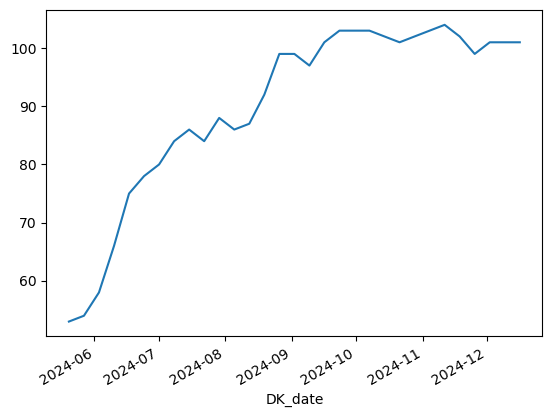

In [124]:
vyvoj2[vyvoj2['DK_titul'] == 'Pacanka']['DK_Chystám_se_číst'].plot()

<Axes: xlabel='DK_date'>

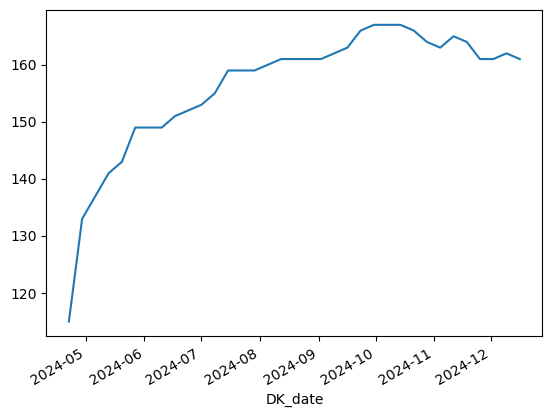

In [125]:
vyvoj2[vyvoj2['DK_titul'] == 'Hella']['DK_Chystám_se_číst'].plot()

## Syntéza (dál už to není zajímavé)

In [127]:
import numpy as np

In [128]:
df = pd.read_json(os.path.join("data","martinus_vyslo.json"))

In [129]:
df

,M_titul,M_autorstvo,M_anotace,M_podtitul,M_tagy,M_počet_stran,M_vazba,M_rozměr,M_hmotnost,M_isbn,...,M_překlad,M_série,M_díl,M_věkové_doporučení,M_styl,M_účel_knihy,M_ostatní,M_příloha,M_jazyková_úroveň,M_knižní_předloha
0,Score\n Novinka,Marcy Jell,"Rafaela:\n Všichni předpokládají, že se mám ja...",None,romantika,200.0,brožovaná vazba,None,None,9788053005999,...,None,None,NaN,NaN,romantický,None,None,None,None,None
1,V nefritové kleci\n Novinka,Jakub Mařík,SBÍRKA KRATŠÍCH PŘÍBĚHŮ ZE SVĚTA AKČNÍ SCI-FI ...,None,"[krvavé bitvy, vesmír, nebezpečné tajemství, v...",464.0,brožovaná vazba,149×205 mm,594 g,9788075887368,...,None,UTSS Salamis,6.0,NaN,"[mysteriózní, dobrodružný, napínavý]",None,None,None,None,None
2,Zmizení nenápadné účetní - Krimi 4/24\n ...,[],Skutečné případy.,None,"[krimi, skutečné příběhy]",144.0,brožovaná vazba,119×189 mm,102 g,9788072225514,...,None,Krimi 2024,4.0,NaN,napínavý,None,None,None,None,None
3,Paralelní světy\n Novinka,Jenny Naomi,"Čekal jsem smrt, jenomže namísto ní přišlo vyh...",Poslední potomek,"[paralelní svět, fantasy, svět]",NaN,brožovaná vazba,215×155 mm,None,9788088652854,...,None,None,NaN,NaN,mysteriózní,None,None,None,None,None
4,Kacířské vinobraní\n Novinka,Josef Holcman,"Josef Holcman, autor knih Týden co týden (2001...",None,příroda,136.0,brožovaná vazba,144×210 mm,None,9788027153923,...,None,None,NaN,NaN,cestopisný,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,Báječná léta pod psa,Michal Viewegh,Moderní klasika z pera populárního spisovatele...,None,"[Česko, Československo, 20. století, satira, p...",264.0,pevná vazba,146×185 mm,436 g,9788024936802,...,None,None,NaN,NaN,"[duchovní, humorný, filozofický]",None,None,None,None,None
12704,Europeana,Patrik Ouředník,Co je pravda? Historická pravda? Literární pra...,Stručné dějiny dvacátého věku,None,100.0,pevná vazba,130×210 mm,224 g,9788072078325,...,None,None,NaN,NaN,None,None,None,None,None,None
12705,Zbabělci,Josef Škvorecký,Dnes už kultovní a také světově proslulý román...,None,"[historické události, duše dospívajícího, 1945...",432.0,pevná vazba,139×204 mm,557 g,9788073354008,...,None,Danny Smiřický,1.0,NaN,historický,None,None,None,None,None
12706,Teorie spolehlivosti,Ivan Diviš,Druhé rozšířené vydání. Rozsáhlá kniha krátkýc...,Texty z let 1960/1999,None,712.0,pevná vazba,140×200 mm,26 g,8072151614,...,None,None,NaN,NaN,None,None,None,None,None,None


In [130]:
df['isbn'] = df['M_isbn'].astype(str)

In [131]:
dk['isbn'] = dk['DK_isbn'].astype(str).apply(lambda x: x.replace(".0",""))

In [132]:
gr['isbn'] = gr['GR_isbn'].apply(lambda x: int(x)).astype(str)

ValueError: invalid literal for int() with base 10: '9788026221364.0'

In [ ]:
dk['isbn']

In [ ]:
dkm = dk.merge(df, on="isbn", how="inner")

In [ ]:
dkm

In [ ]:
dkm = dkm.merge(gr, on="isbn", how="inner")

In [ ]:
dkm

In [ ]:
dkm.columns

In [ ]:
import seaborn as sns

In [ ]:
merged = pd.DataFrame(dkm[(dkm['DK_ratings_count'] > 10) & (dkm['GR_ratings_count'] > 5)].groupby(['isbn','M_počet_stran'])[['DK_Chystám_se_číst','DK_rating','DK_ratings_count','DK_Přečtených','GR_rating','GR_ratings_count']].max()).reset_index()

In [ ]:
merged[['isbn','DK_ratings_count','GR_ratings_count']]

In [ ]:
merged.to_csv(os.path.join('../one-off-jupyters','trenovaci.csv'), index=False)

In [ ]:
merged

In [ ]:
pd.Series(merged.groupby('isbn')['DK_ratings_count'].max() / merged.groupby('isbn')['GR_ratings_count'].max()).plot.density()

In [ ]:
pd.Series(merged.groupby('isbn')['DK_ratings_count'].max() / merged.groupby('isbn')['GR_ratings_count'].max()).nlargest()

In [ ]:
pd.Series(merged.groupby('isbn')['DK_ratings_count'].max() / merged.groupby('isbn')['GR_ratings_count'].max()).nsmallest()

In [ ]:
sns.lmplot(x='DK_ratings_count', y='GR_ratings_count', data=merged)

In [ ]:
sns.lmplot(x='M_počet_stran', y='DK_Přečtených', data=merged)

In [ ]:
sns.lmplot(x='M_počet_stran', y='DK_ratings_count', data=merged)

In [ ]:
zacatek = int(len(merged)*0.5)
konec = int(len(merged)*0.25)
len(merged.head(konec).tail(zacatek))

In [ ]:
sns.lmplot(x='M_počet_stran', y='DK_rating', data=merged.head(konec).tail(zacatek).sort_values(by='M_počet_stran'))

In [ ]:
sns.lmplot(x='M_počet_stran', y='DK_rating', data=merged)

In [ ]:
sns.lmplot(x='M_počet_stran', y='DK_Chystám_se_číst', data=merged)

## Co se líbí

In [ ]:
dk.columns

In [ ]:
tagy = dk.copy()
tagy['DK_tags'] = tagy['DK_tags'].apply(lambda x: x.replace(f"""[""",'').replace(f"""]""",'').replace(f"""'""","").split(', '))
tagy = tagy.explode('DK_tags')
tagy['DK_tags'] = tagy['DK_tags'].apply(lambda x: x.lower())
tagy = tagy[['DK_date','DK_titul','DK_ratings_count','DK_rating','DK_tags']]
tagy = tagy[tagy['DK_date'] > week_ago]

In [ ]:
tagy

In [ ]:
romany = tagy[tagy['DK_tags'].str.contains('román',na=False)]['DK_titul'].drop_duplicates().to_list()

In [ ]:
tagy['DK_tags'].nunique()

In [ ]:
dk.sample

In [ ]:
nejcastejsi_tagy = tagy.groupby('DK_tags').size()
nejcastejsi_tagy = nejcastejsi_tagy[nejcastejsi_tagy >= 10]
nejcastejsi_tagy = nejcastejsi_tagy.index.to_list()
len(nejcastejsi_tagy)

In [ ]:
nejcastejsi_tagy

In [ ]:
zebricek = tagy[(tagy['DK_tags'].isin(nejcastejsi_tagy)) & (tagy['DK_titul'].isin(romany))].groupby('DK_tags')['DK_rating'].mean().sort_values(ascending=False)

In [ ]:
zebricek.head(20)

In [ ]:
zebricek.tail(20)

In [ ]:
dk.columns

In [ ]:
dk['DK_date'] = pd.to_datetime(dk['DK_date'])

In [ ]:
dk[dk['DK_titul'] == 'Rozložíš paměť']

In [ ]:
dk.groupby(["DK_titul",pd.Grouper(freq="W",key="DK_date")])['DK_rating'].mean()

## Novinky

In [ ]:
gr.groupby("GR_title")['GR_date'].min().sort_values(ascending=False).head(50)

In [ ]:
dk.groupby("DK_titul")['DK_date'].min().sort_values(ascending=False).head(50)

In [ ]:
dk['nakladatel'] = dk['isbn'].apply(lambda x: nakladatelstvi(x))
pribytek = pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()).groupby('nakladatel').sum().reset_index().sum().iloc[1]
nakladatelstvo = pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()).groupby('nakladatel').sum().reset_index()
nakladatelstvo['podil'] = nakladatelstvo['skore'] / pribytek
nakladatelstvo = nakladatelstvo[nakladatelstvo['podil'] >= 0.005]
nakladatelstvo['podil'] = nakladatelstvo['podil'].apply(lambda x: f"""{round(x * 100, 1)}&nbsp;%""".replace(".", ","))
nakladatelstvo = nakladatelstvo.sort_values(by='skore',ascending=False)
nakladatelstvo = nakladatelstvo.drop(columns=['skore'])

In [ ]:
nakladatelstvo

In [ ]:
dk[(dk['DK_date'] > month_ago) & (dk['nakladatel'] == 'Paseka')]

In [ ]:
str(datetime.datetime.now())

In [ ]:
def koho_vydavaji(nakl):
    global dk
    top = pd.DataFrame(dk[(dk['DK_date'] > month_ago) & (dk['nakladatel'] == nakl)].groupby('hezky_titul')['skore'].max() - dk[(dk['DK_date'] > month_ago) & (dk['nakladatel'] == nakl)].groupby('hezky_titul')['skore'].min()).groupby('hezky_titul').sum().reset_index()
    print(top)
    top = top.groupby('hezky_titul')['skore'].max().nlargest(3).index.to_list()
    print(top)
    top2 = [x.split(":")[0] for x in top if "[" not in x]
    top2 = list(set(top2))
    kolik = len(top2)
    if kolik > 3:
        return top2[:3]
    else:
        return top2

In [ ]:
print(koho_vydavaji('Paseka'))